In [2]:
import pandas as pd

# John Hopkins csse_covid_19_daily_reports data inconsistent

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/02-04-2020.csv

versus

https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv



Lets assume `Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active`

In [3]:
sg = pd.read_csv("singapore.csv", index_col=False, parse_dates=["Last_Update"], names=["Country_Region", "Last_Update", "Lat", "Long", "Confirmed", "Deaths","Recovered","Active"])

In [4]:
sg.shape

(195, 8)

In [5]:
sg.head(3)

,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active
0,Singapore,2020-02-02 01:03:32,18.0,0.0,0,NaN,NaN,NaN
1,Singapore,2020-02-02 01:03:32,18.0,0.0,0,NaN,NaN,NaN
2,Singapore,2020-02-04 15:33:03,24.0,0.0,0,NaN,NaN,NaN


In [6]:
sg.Deaths

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
190    27.0
191    27.0
192    27.0
193    27.0
194    27.0
Name: Deaths, Length: 195, dtype: float64

In [7]:
sg.dtypes

Country_Region            object
Last_Update       datetime64[ns]
Lat                      float64
Long                     float64
Confirmed                  int64
Deaths                   float64
Recovered                float64
Active                   float64
dtype: object

In [26]:
import matplotlib.pyplot as plt
import mplcursors

ModuleNotFoundError: No module named 'mplcursors'

# Howto plot with mathplot lib

<https://discourse.matplotlib.org/t/gnuplot-to-matplotlib-time-series/21496/2>

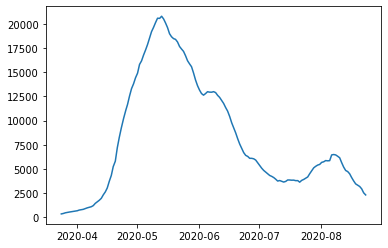

In [9]:
plt.plot("Last_Update", "Active", data=sg)

# Lag window

https://www.reddit.com/r/datascience/comments/ifhpiv/cumulative_to_daily_count_in_a_panda/g2nr9s0/?context=3

In [10]:
sg

,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active
0,Singapore,2020-02-02 01:03:32,18.0000,0.0000,0,NaN,NaN,NaN
1,Singapore,2020-02-02 01:03:32,18.0000,0.0000,0,NaN,NaN,NaN
2,Singapore,2020-02-04 15:33:03,24.0000,0.0000,0,NaN,NaN,NaN
3,Singapore,2020-02-05 16:33:03,28.0000,0.0000,0,NaN,NaN,NaN
4,Singapore,2020-02-05 16:33:03,28.0000,0.0000,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
190,Singapore,2020-08-18 04:27:56,1.2833,103.8333,55838,27.0,52350.0,3461.0
191,Singapore,2020-08-20 04:27:43,1.2833,103.8333,56031,27.0,52810.0,3194.0
192,Singapore,2020-08-21 04:27:41,1.2833,103.8333,56099,27.0,53119.0,2953.0
193,Singapore,2020-08-22 04:27:49,1.2833,103.8333,56216,27.0,53651.0,2538.0


In [12]:
sg['confirmed_day_before'] =  sg['Confirmed'].shift(1)  

In [14]:
sg['daily_increase'] = sg['Confirmed'] - sg['confirmed_day_before']    

In [15]:
sg

,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,confirmed_day_before,daily_increase
0,Singapore,2020-02-02 01:03:32,18.0000,0.0000,0,NaN,NaN,NaN,NaN,NaN
1,Singapore,2020-02-02 01:03:32,18.0000,0.0000,0,NaN,NaN,NaN,0.0,0.0
2,Singapore,2020-02-04 15:33:03,24.0000,0.0000,0,NaN,NaN,NaN,0.0,0.0
3,Singapore,2020-02-05 16:33:03,28.0000,0.0000,0,NaN,NaN,NaN,0.0,0.0
4,Singapore,2020-02-05 16:33:03,28.0000,0.0000,0,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
190,Singapore,2020-08-18 04:27:56,1.2833,103.8333,55838,27.0,52350.0,3461.0,55747.0,91.0
191,Singapore,2020-08-20 04:27:43,1.2833,103.8333,56031,27.0,52810.0,3194.0,55838.0,193.0
192,Singapore,2020-08-21 04:27:41,1.2833,103.8333,56099,27.0,53119.0,2953.0,56031.0,68.0
193,Singapore,2020-08-22 04:27:49,1.2833,103.8333,56216,27.0,53651.0,2538.0,56099.0,117.0


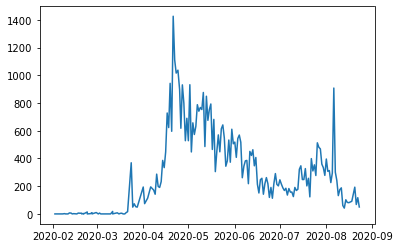

In [18]:
plt.plot("Last_Update", "daily_increase", data=sg)

In [19]:
sg.drop_duplicates(subset=sg.columns, inplace=True)

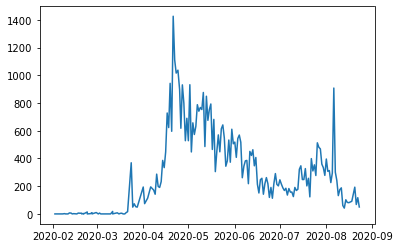

In [20]:
plt.plot("Last_Update", "daily_increase", data=sg)

In [24]:
sg.to_excel("output.xlsx", sheet_name='covidsg')